In [1]:
import sys
sys.path.append('..')

from utils.common import read_beacon_coords, read_beacon_data, process_beacon_data, process_beacon_data_for_pos
import argparse
import pandas as pd

args = argparse.Namespace(beacon_coords_file='../data0821p/beacon_coords.txt', beacon_data_file='../data0821p/bluetoozthData_1.0m.txt', update_frequency=10)

actual_coords = read_beacon_coords(args.beacon_coords_file)
beacon_data = read_beacon_data(args.beacon_data_file)
print("beacon_data", beacon_data)
print(type(beacon_data))


# actual_coords_df = pd.DataFrame(actual_coords)

# # Convert beacon_data to a DataFrame
# beacon_data_df = pd.DataFrame(beacon_data)

# print("Actual Coordinates DataFrame:")
# print(actual_coords_df)
# print(actual_coords_df.dtypes)

# print("\nBeacon Data DataFrame:")
# print(beacon_data_df)
# print(beacon_data_df.dtypes)


beacon_data [[{'uuid': '88400000-0000-0000-0000-000000000000', 'rssi': -56, 'accuracy': 4.817547502022513, 'time': 1724221553330}], [{'uuid': '88400000-0000-0000-0000-000000000000', 'rssi': -56, 'accuracy': 4.817547502022513, 'time': 1724221553431}], [{'uuid': '88400000-0000-0000-0000-000000000000', 'rssi': -56, 'accuracy': 4.817547502022513, 'time': 1724221553529}, {'uuid': '1a040000-0000-0000-0000-000000000000', 'rssi': -68, 'accuracy': 29.992573490350974, 'time': 1724221553529}], [{'uuid': '88400000-0000-0000-0000-000000000000', 'rssi': -56, 'accuracy': 4.817547502022513, 'time': 1724221553633}, {'uuid': '1a040000-0000-0000-0000-000000000000', 'rssi': -68, 'accuracy': 29.992573490350974, 'time': 1724221553633}], [{'uuid': '88400000-0000-0000-0000-000000000000', 'rssi': -56, 'accuracy': 4.817547502022513, 'time': 1724221553731}, {'uuid': '1a040000-0000-0000-0000-000000000000', 'rssi': -68, 'accuracy': 29.992573490350974, 'time': 1724221553731}], [{'uuid': '88400000-0000-0000-0000-000

Interval between data 0 and 1: 0.10 seconds
Interval between data 1 and 2: 0.10 seconds
Interval between data 2 and 3: 0.10 seconds
Interval between data 3 and 4: 0.10 seconds
Interval between data 4 and 5: 0.10 seconds
Interval between data 5 and 6: 0.10 seconds
Interval between data 6 and 7: 0.09 seconds
Interval between data 7 and 8: 0.10 seconds
Interval between data 8 and 9: 0.10 seconds
Interval between data 9 and 10: 0.10 seconds
Interval between data 10 and 11: 0.10 seconds
Interval between data 11 and 12: 0.10 seconds
Interval between data 12 and 13: 0.10 seconds
Interval between data 13 and 14: 0.10 seconds
Interval between data 14 and 15: 0.10 seconds
Interval between data 15 and 16: 0.11 seconds
Interval between data 16 and 17: 0.09 seconds
Interval between data 17 and 18: 0.10 seconds
Interval between data 18 and 19: 0.10 seconds
Interval between data 19 and 20: 0.10 seconds
Interval between data 20 and 21: 0.10 seconds
Interval between data 21 and 22: 0.10 seconds
Interva

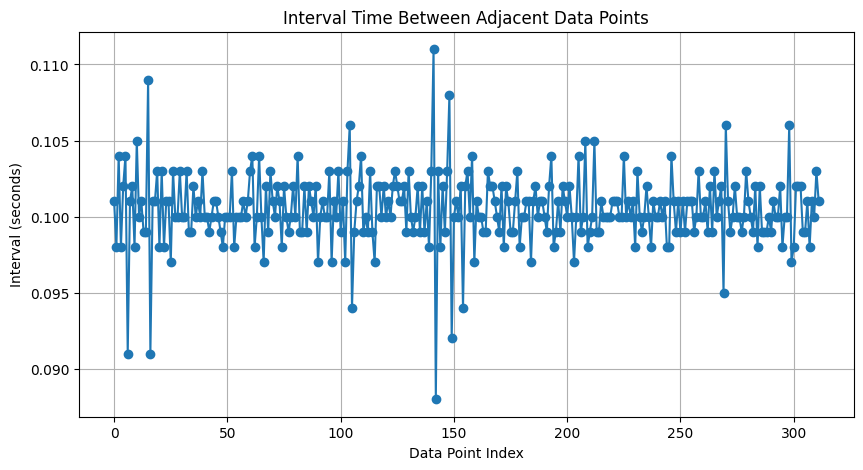

Average interval: 0.10 seconds
Minimum interval: 0.09 seconds
Maximum interval: 0.11 seconds


In [2]:
import matplotlib.pyplot as plt

intervals = []
for i in range(len(beacon_data) - 1):
    current_time = beacon_data[i][0]['time']
    next_time = beacon_data[i+1][0]['time']
    interval = (next_time - current_time) / 1000  # Convert milliseconds to seconds
    intervals.append(interval)
    print(f"Interval between data {i} and {i+1}: {interval:.2f} seconds")

plt.figure(figsize=(10, 5))
plt.plot(range(len(intervals)), intervals, marker='o')
plt.title('Interval Time Between Adjacent Data Points')
plt.xlabel('Data Point Index')
plt.ylabel('Interval (seconds)')
plt.grid(True)
plt.show()

print(f"Average interval: {sum(intervals) / len(intervals):.2f} seconds")
print(f"Minimum interval: {min(intervals):.2f} seconds")
print(f"Maximum interval: {max(intervals):.2f} seconds")

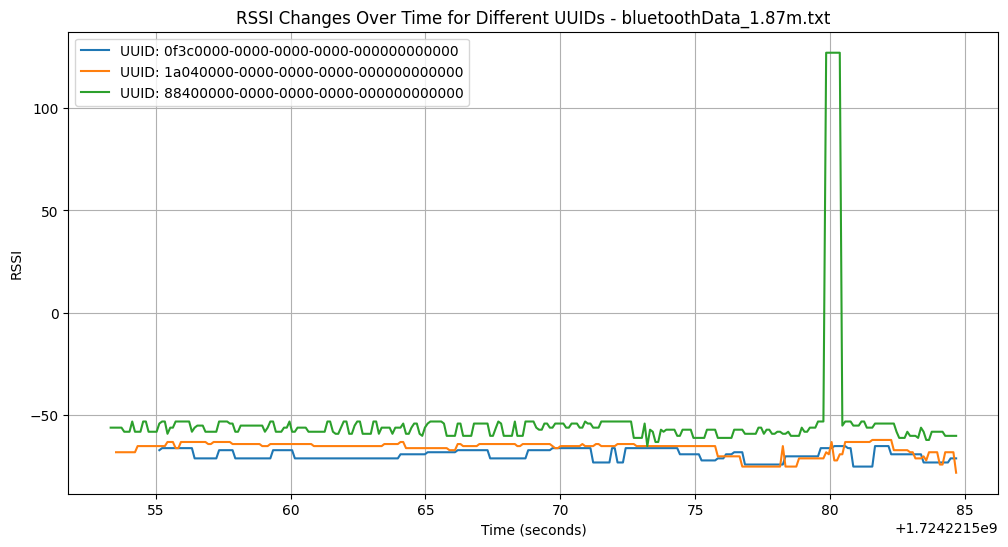

File: bluetoothData_1.87m.txt
UUID: 0f3c0000-0000-0000-0000-000000000000
  Number of data points: 295
  Min RSSI: -75
  Max RSSI: -65
  Average RSSI: -69.34

UUID: 1a040000-0000-0000-0000-000000000000
  Number of data points: 311
  Min RSSI: -78
  Max RSSI: -62
  Average RSSI: -66.05

UUID: 88400000-0000-0000-0000-000000000000
  Number of data points: 313
  Min RSSI: -65
  Max RSSI: 127
  Average RSSI: -53.07





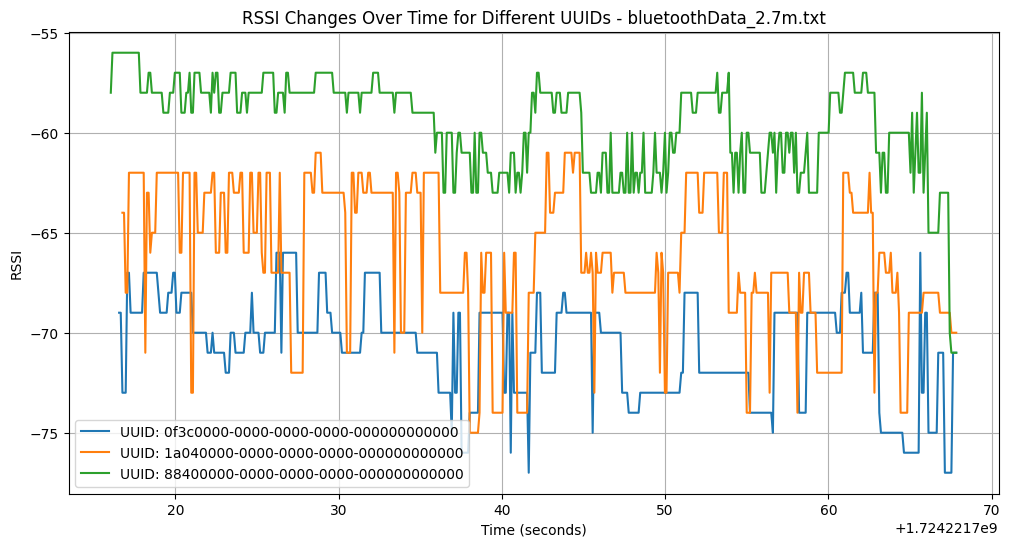

File: bluetoothData_2.7m.txt
UUID: 0f3c0000-0000-0000-0000-000000000000
  Number of data points: 512
  Min RSSI: -77
  Max RSSI: -66
  Average RSSI: -70.76

UUID: 1a040000-0000-0000-0000-000000000000
  Number of data points: 510
  Min RSSI: -75
  Max RSSI: -61
  Average RSSI: -66.19

UUID: 88400000-0000-0000-0000-000000000000
  Number of data points: 517
  Min RSSI: -71
  Max RSSI: -56
  Average RSSI: -59.61





In [3]:
# Print RSSI values between adjacent lists in beacon_data
import matplotlib.pyplot as plt

import os
import glob

# Get all bluetooth data files
data_files = sorted(glob.glob('../data0821p/bluetoothData*.txt'))

for file_path in data_files:
    # Read beacon data from the current file
    beacon_data = read_beacon_data(file_path)
    
    # Create a dictionary to store RSSI values for each UUID
    uuid_rssi_data = {}

    # Collect RSSI data for each UUID
    for data_list in beacon_data:
        for beacon in data_list:
            uuid = beacon['uuid']
            rssi = beacon['rssi']
            time = beacon['time'] / 1000  # Convert milliseconds to seconds
            
            if uuid not in uuid_rssi_data:
                uuid_rssi_data[uuid] = {'time': [], 'rssi': []}
            
            uuid_rssi_data[uuid]['time'].append(time)
            uuid_rssi_data[uuid]['rssi'].append(rssi)

    # Plot RSSI changes for each UUID
    plt.figure(figsize=(12, 6))

    # Sort UUIDs to ensure consistent order
    sorted_uuids = sorted(uuid_rssi_data.keys())

    for uuid in sorted_uuids:
        data = uuid_rssi_data[uuid]
        plt.plot(data['time'], data['rssi'], label=f'UUID: {uuid}')

    plt.title(f'RSSI Changes Over Time for Different UUIDs - {os.path.basename(file_path)}')
    plt.xlabel('Time (seconds)')
    plt.ylabel('RSSI')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Print summary statistics
    print(f"File: {os.path.basename(file_path)}")
    for uuid in sorted_uuids:
        data = uuid_rssi_data[uuid]
        print(f"UUID: {uuid}")
        print(f"  Number of data points: {len(data['rssi'])}")
        print(f"  Min RSSI: {min(data['rssi'])}")
        print(f"  Max RSSI: {max(data['rssi'])}")
        print(f"  Average RSSI: {sum(data['rssi']) / len(data['rssi']):.2f}")
        print()
    print("\n" + "="*50 + "\n")


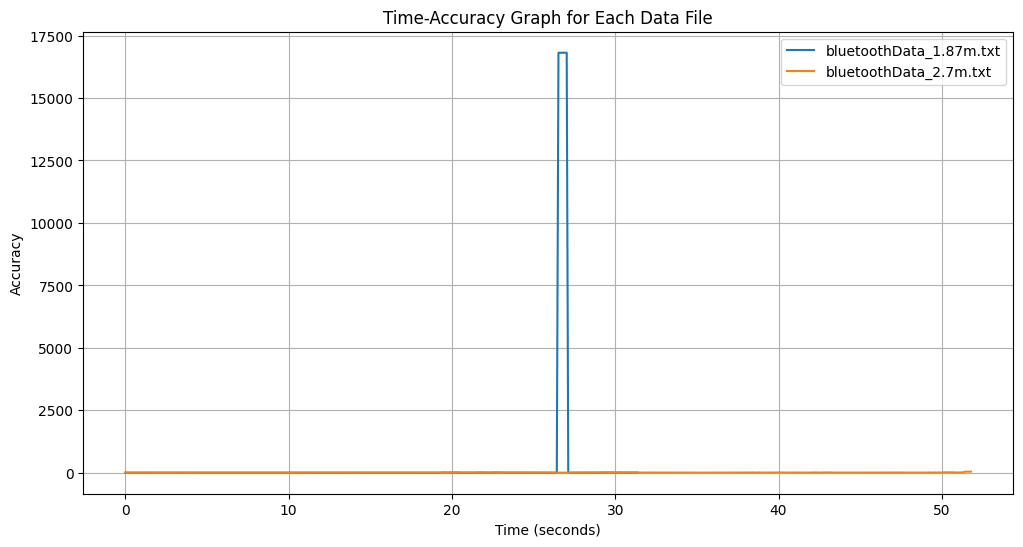

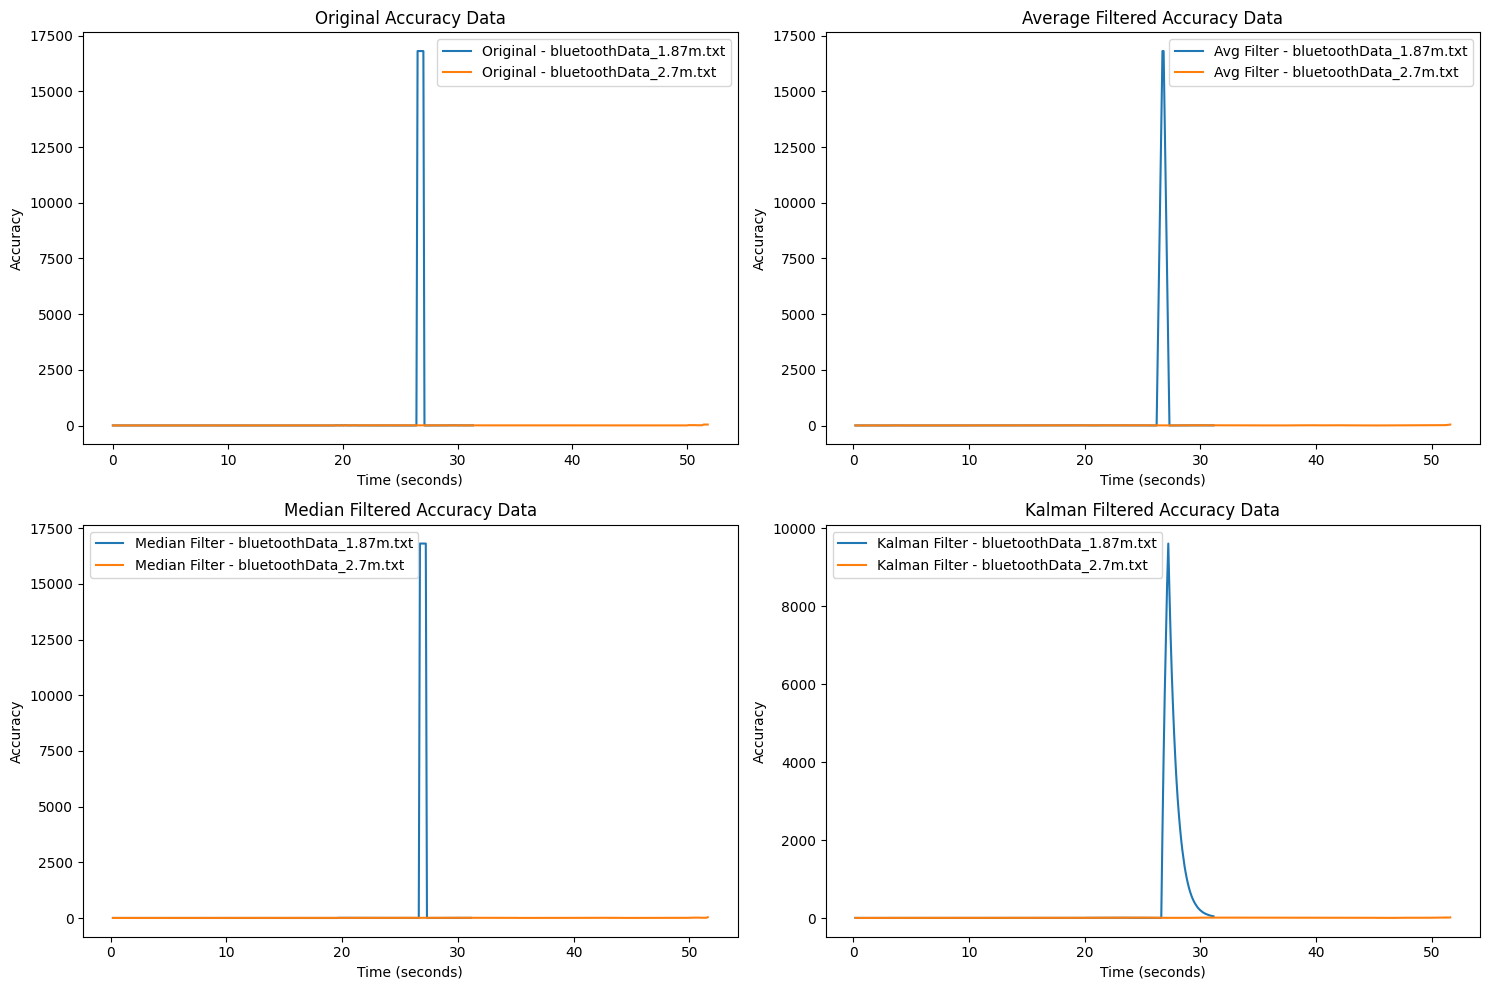

{1.87: 4.817547502022513, 2.7: 6.60036888795063}


In [4]:
# # Read data files and plot time-accuracy graph for each file
# plt.figure(figsize=(12, 6))

# for file_path in data_files:
#     beacon_data = read_beacon_data(file_path)
    
#     # Extract timestamps and calculate time differences
#     timestamps = []
#     accuracies = []
#     for data in beacon_data:
#         if data:  # Check if the data list is not empty
#             timestamps.append(data[0]['time'])
#             accuracies.append(data[0]['accuracy'])
    
#     time_diffs = [(t - timestamps[0]) / 1000 for t in timestamps]  # Convert to seconds
    
#     # Plot time-accuracy graph for this file
#     plt.plot(time_diffs, accuracies, label=os.path.basename(file_path))

# plt.title('Time-Accuracy Graph for Each Data File')
# plt.xlabel('Time (seconds)')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.grid(True)
# plt.show()


# import numpy as np
# from scipy.signal import medfilt
# from filterpy.kalman import KalmanFilter
# import re

# def apply_average_filter(data, window_size=5):
#     return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# def apply_median_filter(data, window_size=9):
#     return medfilt(data, kernel_size=window_size)

# def apply_kalman_filter(data):
#     kf = KalmanFilter(dim_x=1, dim_z=1)
#     kf.x = np.array([data[0]])
#     kf.P *= 1000.
#     kf.R = 5
#     kf.Q = 0.1
#     kf.H = np.array([[1.]])
#     kf.F = np.array([[1.]])
    
#     filtered_data = []
#     for measurement in data:
#         kf.predict()
#         kf.update(measurement)
#         filtered_data.append(kf.x[0])
#     return filtered_data

# # Apply filters to accuracy data and plot graphs
# plt.figure(figsize=(15, 10))

# # Initialize the distance-accuracy dictionary
# distance_accuracy_dict = {}

# for file_path in data_files:
#     beacon_data = read_beacon_data(file_path)
    
#     # Extract timestamps and calculate time differences
#     timestamps = []
#     accuracies = []
#     for data in beacon_data:
#         if data:  # Check if the data list is not empty
#             timestamps.append(data[0]['time'])
#             accuracies.append(data[0]['accuracy'])
    
#     time_diffs = [(t - timestamps[0]) / 1000 for t in timestamps]  # Convert to seconds
    
#     # Apply filters
#     avg_filtered = apply_average_filter(accuracies)
#     median_filtered = apply_median_filter(accuracies)
#     kalman_filtered = apply_kalman_filter(accuracies)
    
#     # Adjust time_diffs for filtered data (due to window size in average and median filters)
#     filtered_time_diffs = time_diffs[2:-2]  # Assuming window_size=5 for both filters
    
#     # Ensure all arrays have the same length
#     min_length = min(len(filtered_time_diffs), len(avg_filtered), len(median_filtered), len(kalman_filtered))
#     filtered_time_diffs = filtered_time_diffs[:min_length]
#     avg_filtered = avg_filtered[:min_length]
#     median_filtered = median_filtered[:min_length]
#     kalman_filtered = kalman_filtered[:min_length]
    
#     # Calculate and store average median accuracy
#     median_accuracy = np.median(median_filtered)
    
#     match = re.search(r'(\d+(?:\.\d+)?)m', os.path.basename(file_path))
#     if match:
#         distance = float(match.group(1))
#         distance_accuracy_dict[distance] = median_accuracy
#     else:
#         print(f"Warning: Could not extract distance from filename: {file_path}")

    
#     distance_accuracy_dict[distance] = median_accuracy
    
#     # Adjust time_diffs for filtered data (due to window size in average and median filters)
#     filtered_time_diffs = time_diffs[2:-2]  # Assuming window_size=5 for both filters
#     # Plot original and filtered data
#     plt.subplot(2, 2, 1)
#     plt.plot(time_diffs, accuracies, label=f'Original - {os.path.basename(file_path)}')
#     plt.title('Original Accuracy Data')
#     plt.xlabel('Time (seconds)')
#     plt.ylabel('Accuracy')
#     plt.legend()
    
#     plt.subplot(2, 2, 2)
#     plt.plot(filtered_time_diffs, avg_filtered, label=f'Avg Filter - {os.path.basename(file_path)}')
#     plt.title('Average Filtered Accuracy Data')
#     plt.xlabel('Time (seconds)')
#     plt.ylabel('Accuracy')
#     plt.legend()
    
#     plt.subplot(2, 2, 3)
#     plt.plot(filtered_time_diffs, median_filtered, label=f'Median Filter - {os.path.basename(file_path)}')
#     plt.title('Median Filtered Accuracy Data')
#     plt.xlabel('Time (seconds)')
#     plt.ylabel('Accuracy')
#     plt.legend()
    
#     plt.subplot(2, 2, 4)
#     plt.plot(filtered_time_diffs, kalman_filtered, label=f'Kalman Filter - {os.path.basename(file_path)}')
#     plt.title('Kalman Filtered Accuracy Data')
#     plt.xlabel('Time (seconds)')
#     plt.ylabel('Accuracy')
#     plt.legend()

# plt.tight_layout()
# plt.show()

# print(distance_accuracy_dict)


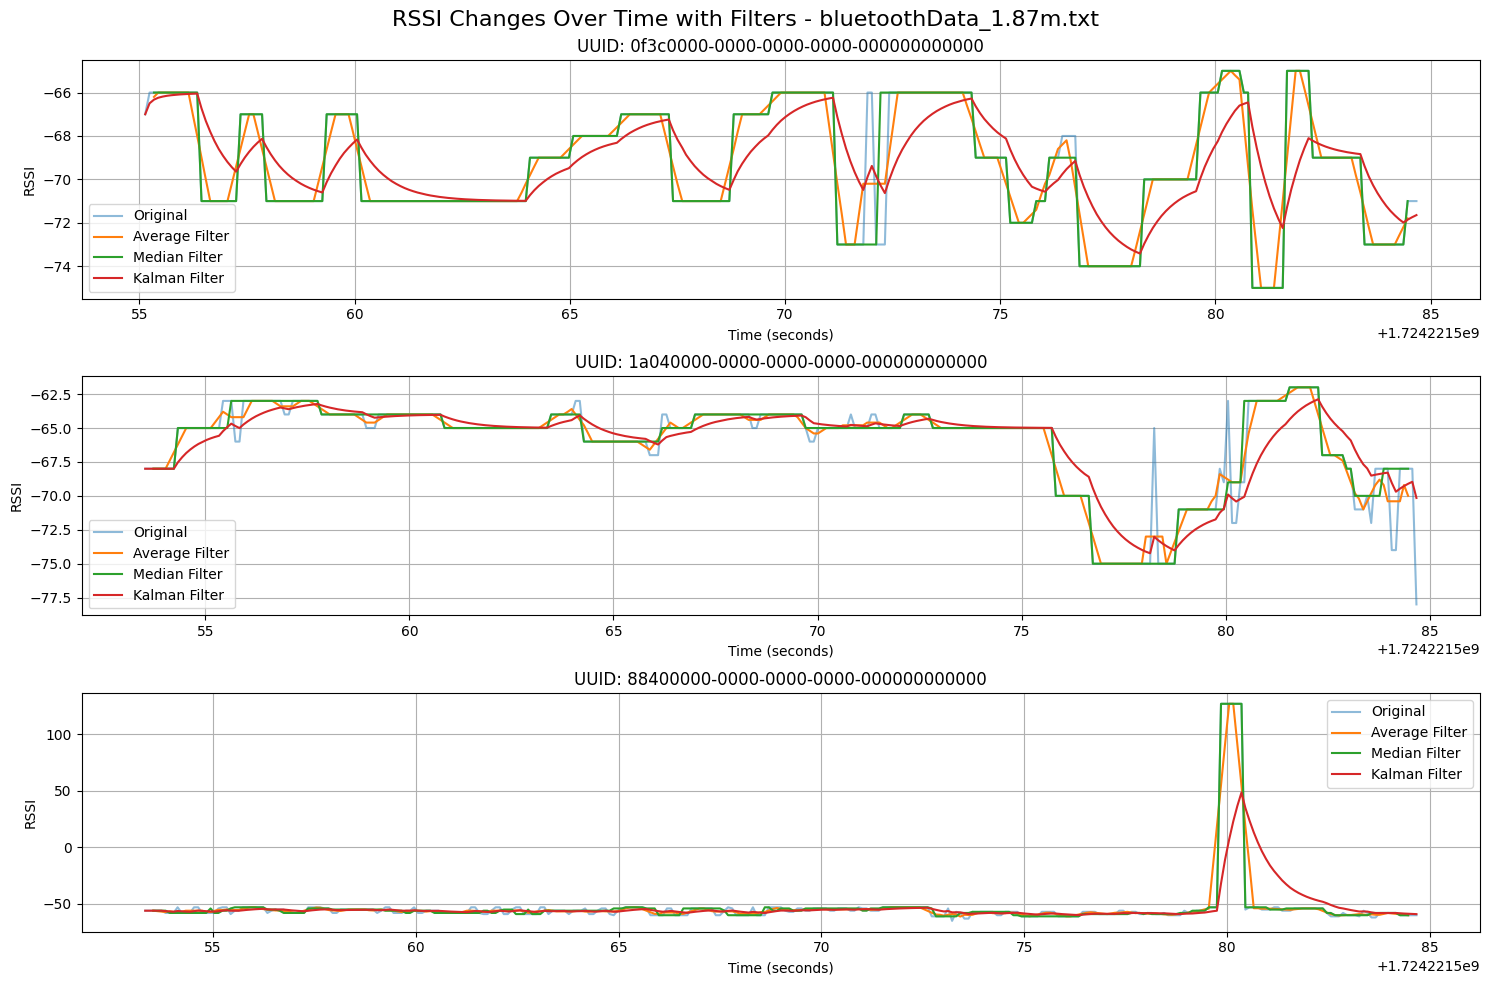

File: bluetoothData_1.87m.txt
UUID: 0f3c0000-0000-0000-0000-000000000000
  Original mean RSSI: -69.34
  Average filter mean RSSI: -69.34
  Median filter mean RSSI: -69.35
  Kalman filter mean RSSI: -69.22

UUID: 1a040000-0000-0000-0000-000000000000
  Original mean RSSI: -66.05
  Average filter mean RSSI: -65.99
  Median filter mean RSSI: -65.98
  Kalman filter mean RSSI: -65.99

UUID: 88400000-0000-0000-0000-000000000000
  Original mean RSSI: -53.07
  Average filter mean RSSI: -53.01
  Median filter mean RSSI: -53.07
  Kalman filter mean RSSI: -53.01





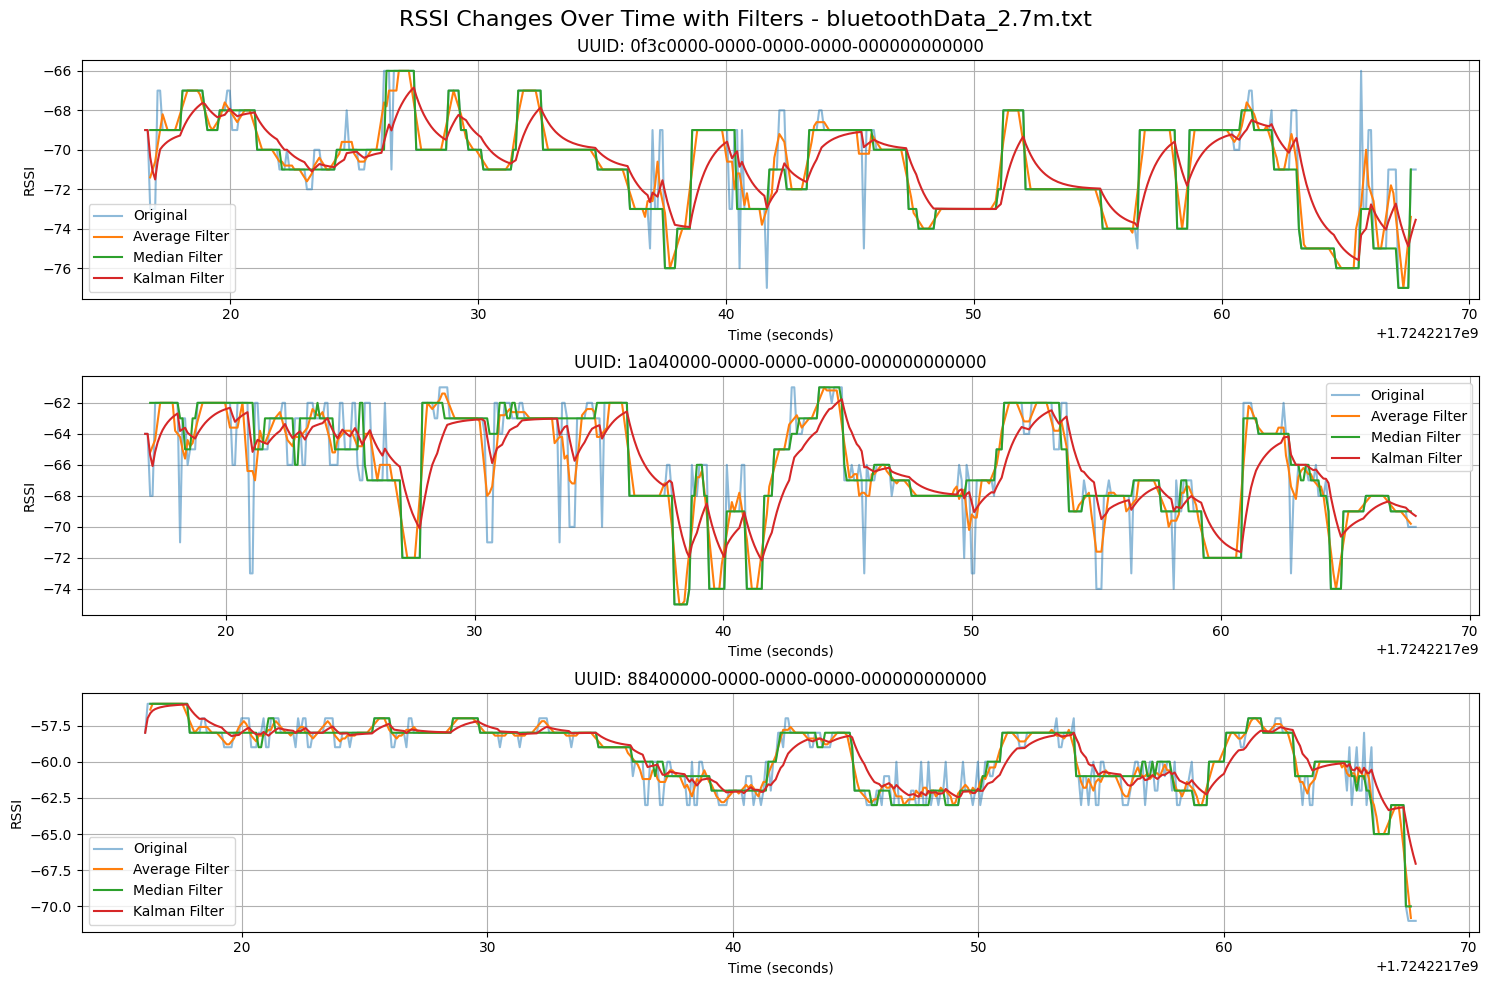

File: bluetoothData_2.7m.txt
UUID: 0f3c0000-0000-0000-0000-000000000000
  Original mean RSSI: -70.76
  Average filter mean RSSI: -70.75
  Median filter mean RSSI: -70.83
  Kalman filter mean RSSI: -70.71

UUID: 1a040000-0000-0000-0000-000000000000
  Original mean RSSI: -66.19
  Average filter mean RSSI: -66.18
  Median filter mean RSSI: -65.94
  Kalman filter mean RSSI: -66.13

UUID: 88400000-0000-0000-0000-000000000000
  Original mean RSSI: -59.61
  Average filter mean RSSI: -59.58
  Median filter mean RSSI: -59.56
  Kalman filter mean RSSI: -59.48



Filename to Median Mean RSSI Mapping (for UUID starting with 8840):
bluetoothData_1.87m.txt: -53.07
bluetoothData_2.7m.txt: -59.56


In [5]:
import numpy as np
from scipy.signal import medfilt
from filterpy.kalman import KalmanFilter
import re


# Dictionary to store filename to Kalman mean RSSI mapping
def apply_average_filter(data, window_size=5):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

def apply_median_filter(data, window_size=9):
    return medfilt(data, kernel_size=window_size)

def apply_kalman_filter(data):
    kf = KalmanFilter(dim_x=1, dim_z=1)
    kf.x = np.array([data[0]])
    kf.P *= 1000.
    kf.R = 5
    kf.Q = 0.1
    kf.H = np.array([[1.]])
    kf.F = np.array([[1.]])
    
    filtered_data = []
    for measurement in data:
        kf.predict()
        kf.update(measurement)
        filtered_data.append(kf.x[0])
    return filtered_data

filename_to_median_mean_rssi = {}

# Apply filters and calculate mean signal strength for each UUID
for file_path in data_files:
    beacon_data = read_beacon_data(file_path)
    
    # Create a dictionary to store RSSI values for each UUID
    uuid_rssi_data = {}

    # Collect RSSI data for each UUID
    for data_list in beacon_data:
        for beacon in data_list:
            uuid = beacon['uuid']
            rssi = beacon['rssi']
            time = beacon['time'] / 1000  # Convert milliseconds to seconds
            
            if uuid not in uuid_rssi_data:
                uuid_rssi_data[uuid] = {'time': [], 'rssi': []}
            
            uuid_rssi_data[uuid]['time'].append(time)
            uuid_rssi_data[uuid]['rssi'].append(rssi)

    # Plot original and filtered RSSI changes for each UUID
    plt.figure(figsize=(15, 10))

    # Sort UUIDs to ensure consistent order
    sorted_uuids = sorted(uuid_rssi_data.keys())

    kalman_mean_rssi_list = []

    for i, uuid in enumerate(sorted_uuids):
        data = uuid_rssi_data[uuid]
        time = np.array(data['time'])
        rssi = np.array(data['rssi'])
        
        avg_filtered = apply_average_filter(rssi)
        median_filtered = apply_median_filter(rssi)
        kalman_filtered = apply_kalman_filter(rssi)
        
        plt.subplot(len(sorted_uuids), 1, i+1)
        plt.plot(time, rssi, label='Original', alpha=0.5)
        plt.plot(time[2:-2], avg_filtered, label='Average Filter')
        plt.plot(time[2:-2], median_filtered[2:-2], label='Median Filter')
        plt.plot(time, kalman_filtered, label='Kalman Filter')
        
        plt.xlabel('Time (seconds)')
        plt.ylabel('RSSI')
        plt.legend()
        plt.grid(True)
        plt.title(f'UUID: {uuid}')  # Add UUID to the subplot title

        kalman_mean_rssi_list.append(np.mean(kalman_filtered))

    plt.tight_layout()
    plt.suptitle(f'RSSI Changes Over Time with Filters - {os.path.basename(file_path)}', fontsize=16)
    plt.subplots_adjust(top=0.93)
    plt.show()

    # Store the mean Kalman filtered RSSI for this file (only for UUID starting with 8840)
    for uuid in sorted_uuids:
        if uuid.startswith('8840'):
            data = uuid_rssi_data[uuid]
            median_filtered = apply_median_filter(np.array(data['rssi']))
            filename_to_median_mean_rssi[os.path.basename(file_path)] = np.mean(median_filtered)
            break  # Assuming there's only one UUID starting with 8840 per file

    # Print summary statistics
    print(f"File: {os.path.basename(file_path)}")
    for uuid in sorted_uuids:
        data = uuid_rssi_data[uuid]
        original_rssi = np.array(data['rssi'])
        avg_filtered = apply_average_filter(original_rssi)
        median_filtered = apply_median_filter(original_rssi)
        kalman_filtered = apply_kalman_filter(original_rssi)
        
        print(f"UUID: {uuid}")
        print(f"  Original mean RSSI: {np.mean(original_rssi):.2f}")
        print(f"  Average filter mean RSSI: {np.mean(avg_filtered):.2f}")
        print(f"  Median filter mean RSSI: {np.mean(median_filtered):.2f}")
        print(f"  Kalman filter mean RSSI: {np.mean(kalman_filtered):.2f}")
        print()
    print("\n" + "="*50 + "\n")

# Print the filename to Kalman mean RSSI mapping
print("Filename to Median Mean RSSI Mapping (for UUID starting with 8840):")
for filename, mean_rssi in filename_to_median_mean_rssi.items():
    print(f"{filename}: {mean_rssi:.2f}")


Sorted data:
bluetoothData-1.2m-1609.txt: -67.19607843137256
bluetoothData-2.0m-1609.txt: -65.17615658362989
bluetoothData-2.8m-1609.txt: -75.42401215805471
bluetoothData-3.6m-1609.txt: -71.33601286173634
bluetoothData-4.4m-1609.txt: -78.65573770491804
bluetoothData-5.2m-1609.txt: -82.18039772727273
bluetoothData-6.0m-1609.txt: -79.13122171945702
bluetoothData-6.8m-1609.txt: -80.41968162083937
bluetoothData-7.6m-1609.txt: -80.59716599190283
Fit 1: -10.15(d^0.38) + -56.86 parameters: (-10.15, 0.38, -56.86)
Mean Absolute Error in Distance for Fit 1: -10.15(d^0.38) + -56.86: 2.1890 meters
Fit 2: -66.36 - 12.88log10(d) parameters: (-66.36, 1.288)
Mean Absolute Error in Distance for Fit 2: -66.36 - 12.88log10(d): 3.9417 meters
Fit 3: -49.0 - 43.19log10(d) parameters: (4.319,)
Mean Absolute Error in Distance for Fit 3: -49.0 - 43.19log10(d): 1.0243 meters
Fit 4: Custom equation parameters: (-68.54,)
Mean Absolute Error in Distance for Fit 4: Custom equation: 3.3871 meters
Fit 5: -55.47 - 31.

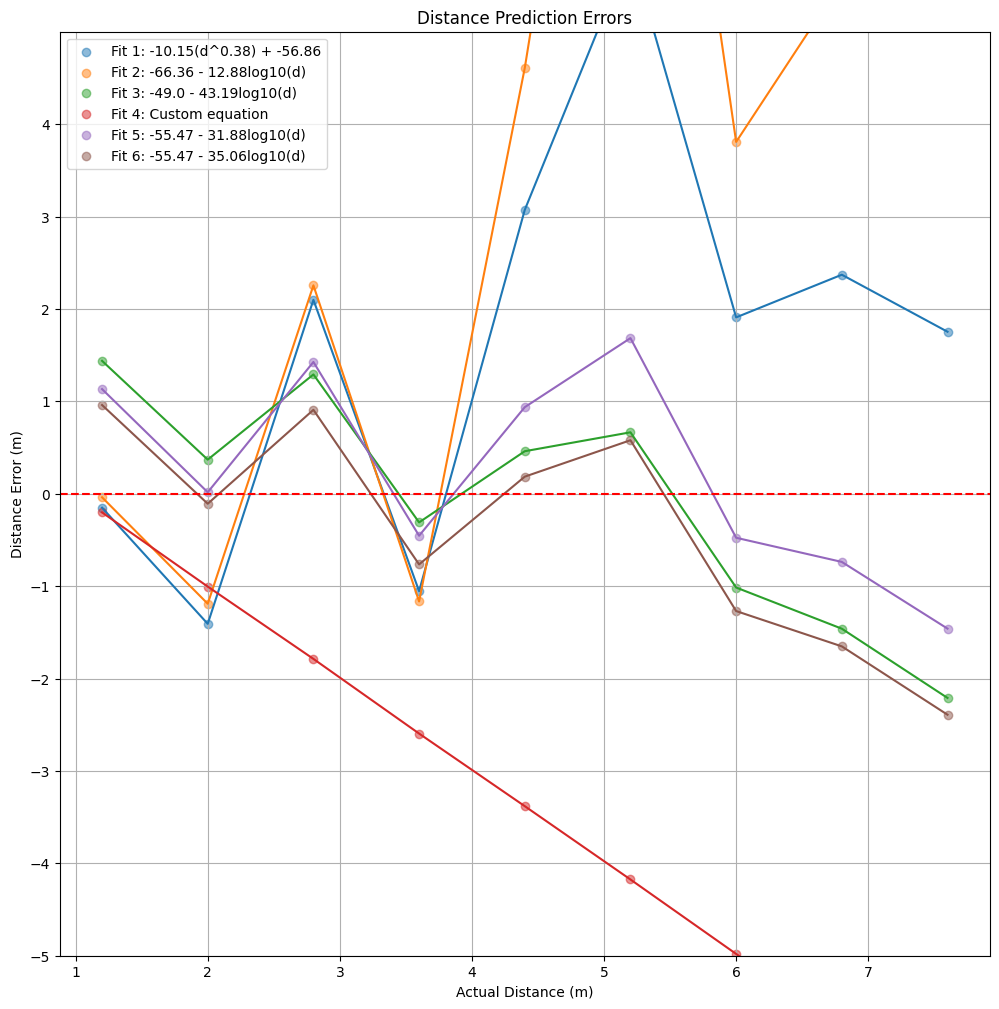

In [7]:
import numpy as np
from scipy.optimize import curve_fit
import re
import matplotlib.pyplot as plt

# Define equations and their inverse functions
def equation1(distance, A, B, C):
    return A * (distance ** B) + C

def equation2(distance, txpower, n):
    return txpower - 10 * n * np.log10(distance)

def equation3(distance, n):
    return -49.0 - 10 * n * np.log10(distance)

def equation4(distance, measured_power):
    ratio = distance / 1.0
    return np.where(ratio < 1.0,
                    measured_power * (ratio ** 10),
                    measured_power * (0.89976 * (ratio ** 7.7095) + 0.111))

def equation5(distance, n):
    return -55.47 - 10 * n * np.log10(distance)

def equation6(distance, n):
    return -68.54 - 10 * n * np.log10(distance)


def inverse_equation1(rssi, A, B, C):
    return ((rssi - C) / A) ** (1/B)

def inverse_equation2(rssi, txpower, n):
    return 10 ** ((txpower - rssi) / (10 * n))

def inverse_equation3(rssi, n):
    return 10 ** ((-49.0 - rssi) / (10 * n))

def inverse_equation4(rssi, measured_power):
    ratio = rssi / measured_power
    return np.where(ratio < 1.0, 
                    ratio ** 0.1, 
                    ((ratio - 0.111) / 0.89976) ** (1/7.7095))
    
def inverse_equation5(rssi, n):
    return 10 ** ((-55.47 - rssi) / (10 * n))

def inverse_equation6(rssi, n):
    return 10 ** ((-55.47 - rssi) / (10 * n))

# Extract data from filename_to_median_mean_rssi
def extract_data(filename_to_median_mean_rssi):
    distances, rssi_values = [], []
    for filename, rssi in filename_to_median_mean_rssi.items():
        match = re.search(r'(\d+(?:\.\d+)?)m', filename)
        if match:
            distances.append(float(match.group(1)))
            rssi_values.append(rssi)
    return np.array(distances), np.array(rssi_values)

# Calculate errors and predictions
def calculate_errors_and_predictions(distances, rssi_values, equations, inverse_equations, params):
    predicted_distances = []
    for inv_eq, p in zip(inverse_equations, params):
        if isinstance(p, (float, int)):
            pred_dist = inv_eq(rssi_values, p)
        else:
            pred_dist = inv_eq(rssi_values, *p)
        predicted_distances.append(pred_dist)
    
    distance_errors = [pred_dist - distances for pred_dist in predicted_distances]
    mae = [np.mean(np.abs(error)) for error in distance_errors]
    return predicted_distances, distance_errors, mae

# Plot results
def plot_results(distances, rssi_values, equations, params, labels):
    plt.figure(figsize=(12, 6))
    plt.scatter(distances, rssi_values, label='Measured RSSI', alpha=0.5)
    for eq, p, label in zip(equations, params, labels):
        plt.plot(distances, eq(distances, *p), '-', label=label)
    plt.xlabel('Distance (m)')
    plt.ylabel('RSSI')
    plt.title('RSSI vs Distance: Fitted Models')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot distance errors
def plot_distance_errors(distances, distance_errors, labels):
    plt.figure(figsize=(12, 12))
    # for errors, label in zip(distance_errors, labels):
    #     plt.scatter(distances, errors, label=f'{label} Errors', alpha=0.5)
    for errors, eq, label, p in zip(distance_errors, equations, labels, params):
        plt.scatter(distances, errors, label=label, alpha=0.5)
        plt.plot(distances, errors, '-') 

    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Actual Distance (m)')
    plt.ylabel('Distance Error (m)')
    plt.ylim(-5, 5)
    plt.yticks(np.arange(-5, 5, 1))
    plt.title('Distance Prediction Errors')
    plt.legend()
    plt.grid(True)
    plt.show()

# Main execution
# Create a dictionary to store the data

# Test distance: 1.2, Test RSSI: -67.19607843137256
# Test distance: 2.0, Test RSSI: -65.17615658362989
# Test distance: 2.8, Test RSSI: -75.42401215805471
# Test distance: 3.6, Test RSSI: -71.33601286173634
# Test distance: 4.4, Test RSSI: -78.65573770491804
# Test distance: 5.2, Test RSSI: -82.18039772727273
# Test distance: 6.0, Test RSSI: -79.13122171945702
# Test distance: 6.8, Test RSSI: -80.41968162083937
# Test distance: 7.6, Test RSSI: -80.59716599190283

filename_to_median_mean_rssi = {
    'bluetoothData-1.2m-1609.txt': -67.19607843137256,
    'bluetoothData-2.0m-1609.txt': -65.17615658362989,
    'bluetoothData-2.8m-1609.txt': -75.42401215805471,
    'bluetoothData-3.6m-1609.txt': -71.33601286173634,
    'bluetoothData-4.4m-1609.txt': -78.65573770491804,
    'bluetoothData-5.2m-1609.txt': -82.18039772727273,
    'bluetoothData-6.0m-1609.txt': -79.13122171945702,
    'bluetoothData-6.8m-1609.txt': -80.41968162083937,
    'bluetoothData-7.6m-1609.txt': -80.59716599190283,
}


# filename_to_median_mean_rssi = {
#     'bluetoothData-10m-1807.txt': -76.86,
#     'bluetoothData-1m-1609.txt': -55.47,
#     'bluetoothData-2m-1639.txt': -60.51,
#     'bluetoothData-3m-1651.txt': -63.83,
#     'bluetoothData-4m-1700.txt': -65.65,
#     'bluetoothData-5m-1710.txt': -65.83,
#     'bluetoothData-6m-1726.txt': -70.87,
#     'bluetoothData-7m-1734.txt': -77.83,
#     'bluetoothData-8m-1742.txt': -77.27,
#     'bluetoothData-9m-1758.txt': -74.67,
# }

# Sort the dictionary by distance (extracted from filename)
sorted_data = sorted(filename_to_median_mean_rssi.items(), 
                     key=lambda x: float(re.search(r'(\d+(?:\.\d+)?)m', x[0]).group(1)) 
                     if re.search(r'(\d+(?:\.\d+)?)m', x[0]) else float('inf'))

# Print sorted data for verification
print("Sorted data:")
for filename, rssi in sorted_data:
    print(f"{filename}: {rssi}")

distances, rssi_values = extract_data(filename_to_median_mean_rssi)

# Equation 1 parameters: A=-10.15, B=0.38, C=-56.86
# Equation 2 parameters: n=43.19
# Equation 3 parameters: txPower=-66.36, n=12.88

params = [
    (-10.15, 0.38, -56.86),
    (-66.36, 1.288),
    (4.319,),
    (-68.54,),
    (3.188,),
    (3.506,),
]
    
equations = [equation1, equation2, equation3, equation4, equation5, equation6]
inverse_equations = [inverse_equation1, inverse_equation2, inverse_equation3, inverse_equation4, inverse_equation5, inverse_equation6]
labels = [
    f'Fit 1: {params[0][0]:.2f}(d^{params[0][1]:.2f}) + {params[0][2]:.2f}',
    f'Fit 2: {params[1][0]:.2f} - {10*params[1][1]:.2f}log10(d)',
    f'Fit 3: -49.0 - {10*params[2][0]:.2f}log10(d)',
    'Fit 4: Custom equation',
    f'Fit 5: -55.47 - {10*params[4][0]:.2f}log10(d)',
    f'Fit 6: -55.47 - {10*params[5][0]:.2f}log10(d)'
]

predicted_distances, distance_errors, mae = calculate_errors_and_predictions(
    distances, rssi_values, equations, inverse_equations, params
)

# plot_results(distances, rssi_values, equations, params, labels)

# Print results
for i, (eq_name, p, m) in enumerate(zip(labels, params, mae)):
    print(f"{eq_name} parameters: {p}")
    print(f"Mean Absolute Error in Distance for {eq_name}: {m:.4f} meters")

print("\nIndividual Errors:")
for i, (distance, rssi) in enumerate(zip(distances, rssi_values)):
    print(f"Actual Distance: {distance:.2f}m, RSSI: {rssi:.2f}")
    for j, pred_dist in enumerate(predicted_distances):
        print(f"  Predicted Distance (Eq{j+1}): {pred_dist[i]:.2f}m, Error: {distance_errors[j][i]:.2f}m")

plot_distance_errors(distances, distance_errors, labels)

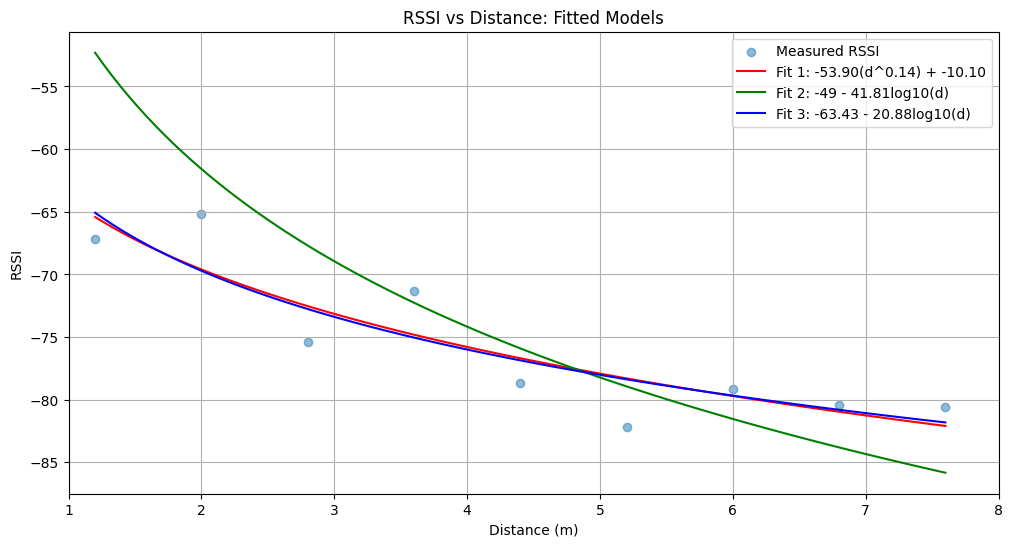

Equation 1 parameters: A=-53.90, B=0.14, C=-10.10
Equation 2 parameters: n=41.81
Equation 3 parameters: txPower=-63.43, n=20.88


In [7]:
import numpy as np
from scipy.optimize import curve_fit
import re
import matplotlib.pyplot as plt

def equation1(distance, A, B, C):
    return A * (distance ** B) + C

def equation2(distance, n):
    return -49 - 10 * n * np.log10(distance)

def equation3(distance, txPower, n):
    return txPower - 10 * n * np.log10(distance)

# Extract distances and RSSI values from filename_to_median_mean_rssi
distances = []
rssi_values = []

for i, (filename, rssi) in enumerate(filename_to_median_mean_rssi.items()):
    match = re.search(r'(\d+(?:\.\d+)?)m', filename)
    if match:
        distance = float(match.group(1))
        distances.append(distance)
        rssi_values.append(rssi)

# Convert to numpy arrays
distances = np.array(distances)
rssi_values = np.array(rssi_values)

# Fit the equations
popt1, _ = curve_fit(equation1, distances, rssi_values)
A, B, C = popt1

popt2, _ = curve_fit(equation2, distances, rssi_values)
n2 = popt2[0]

popt3, _ = curve_fit(equation3, distances, rssi_values)
txPower, n3 = popt3

# Generate points for plotting
plot_distances = np.linspace(min(distances), max(distances), 100)

# Plot the results
plt.figure(figsize=(12, 6))
plt.scatter(distances, rssi_values, label='Measured RSSI', alpha=0.5)
plt.plot(plot_distances, equation1(plot_distances, A, B, C), 'r-', label=f'Fit 1: {A:.2f}(d^{B:.2f}) + {C:.2f}')
plt.plot(plot_distances, equation2(plot_distances, n2), 'g-', label=f'Fit 2: -49 - {10*n2:.2f}log10(d)')
plt.plot(plot_distances, equation3(plot_distances, txPower, n3), 'b-', label=f'Fit 3: {txPower:.2f} - {10*n3:.2f}log10(d)')
plt.xlabel('Distance (m)')
plt.xlim(1, 8)  # Set x-axis limits from 1 to 8 meters
plt.ylabel('RSSI')
plt.title('RSSI vs Distance: Fitted Models')
plt.legend()
plt.grid(True)
plt.show()

print(f"Equation 1 parameters: A={A:.2f}, B={B:.2f}, C={C:.2f}")
print(f"Equation 2 parameters: n={10*n2:.2f}")
print(f"Equation 3 parameters: txPower={txPower:.2f}, n={10*n3:.2f}")

In [8]:
def get_acc_strongest_beacons(beacon_data, beacon_coords):
    strongest_uuids, signal_strengths = process_beacon_data(beacon_data)
    return [beacon_coords[uuid] for uuid in strongest_uuids]

def rssi_to_distance(rssi):
    txPower = -59
    n = 2.0
    return 10 ** ((txPower - rssi) / (10 * n))

In [9]:
import matplotlib.pyplot as plt




In [10]:
# Plot the dynamic positions

plt.figure(figsize=(10, 6))

plt.scatter(actual_coords['x'], actual_coords['y'], c='green', label='Actual Coordinates')
plt.scatter(estimated_coords['x'], estimated_coords['y'], c='red', label='Estimated Coordinates')

plt.title('Estimated vs Actual Coordinates')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.show()

KeyError: 'x'

<Figure size 1000x600 with 0 Axes>